In [2]:
# import the necessary packages
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2
def midpoint(ptA, ptB):
    return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

In [7]:
# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread('1.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)
# perform edge detection, then perform a dilation + erosion to
# close gaps in between object edges
edged = cv2.Canny(gray, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)
# find contours in the edge map
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
# sort the contours from left-to-right and initialize the
# 'pixels per metric' calibration variable
(cnts, _) = contours.sort_contours(cnts)
pixelsPerMetric = None

In [5]:
# loop over the contours individually
for c in cnts:
    if cv2.contourArea(c) < 100:
        continue
    orig = image.copy()
    box = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
    box = np.array(box, dtype="int")
    # order the points in the contour such that they appear
    # in top-left, top-right, bottom-right, and bottom-left
    # order, then draw the outline of the rotated bounding
    # box
    box = perspective.order_points(box)
    cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
    # loop over the original points and draw them
    for (x, y) in box:
        cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)

In [6]:
  # unpack the ordered bounding box, then compute the midpoint
    # between the top-left and top-right coordinates, followed by
    # the midpoint between bottom-left and bottom-right coordinates
(tl, tr, br, bl) = box
(tltrX, tltrY) = midpoint(tl, tr)
(blbrX, blbrY) = midpoint(bl, br)
    # compute the midpoint between the top-left and top-right points,
    # followed by the midpoint between the top-righ and bottom-right
(tlblX, tlblY) = midpoint(tl, bl)
(trbrX, trbrY) = midpoint(tr, br)
    # draw the midpoints on the image
cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
    # draw lines between the midpoints
cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),
(255, 0, 255), 2)
cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),
(255, 0, 255), 2)

NameError: name 'box' is not defined

In [ ]:
	# compute the Euclidean distance between the midpoints
	dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
	dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
	# if the pixels per metric has not been initialized, then
	# compute it as the ratio of pixels to supplied metric
	# (in this case, inches)
	if pixelsPerMetric is None:
		pixelsPerMetric = dB / 0.997

NameError: ignored

In [ ]:
from google.colab.patches import cv2_imshow

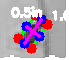

-1

In [ ]:
	# compute the size of the object
	dimA = dA / pixelsPerMetric
	dimB = dB / pixelsPerMetric
	# draw the object sizes on the image
	cv2.putText(orig, "{:.1f}in".format(dimA),
		(int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX,
		0.40, (255, 255, 255), 2)
	cv2.putText(orig, "{:.1f}in".format(dimB),
		(int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX,
		0.40, (255, 255, 255), 2)
	# show the output image

	cv2_imshow(orig)
	cv2.waitKey(0)